# Tutorial 13: Skyrmion in a disk

> Interactive online tutorial:
> [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/ubermag/oommfc/master?filepath=docs%2Fipynb%2Findex.ipynb)

In this tutorial, we compute and relax a skyrmion in a bulk-DMI material in a confined disk like geometry.

In [1]:
import oommfc as oc
import discretisedfield as df

In [2]:
# define mesh in cuboid through corner points p1 and p2, and cell size vector cell
mesh = oc.Mesh(p1=(-50e-9, -50e-9, 0), p2=(50e-9, 50e-9, 10e-9), cell=(5e-9, 5e-9, 5e-9))

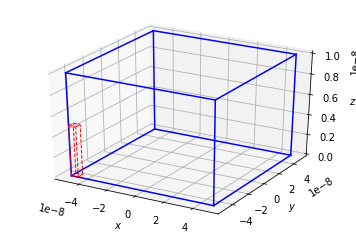

In [3]:
%matplotlib inline
mesh.mpl()

In [4]:
system = oc.System(name='skyrmion')

system.hamiltonian = (oc.Exchange(A=1.6e-11)
                      + oc.DMI(D=4e-3, crystalcalass='Cnv') 
                      + oc.UniaxialAnisotropy(K1=0.51e6, u=(0, 0, 1)) 
                      + oc.Demag() + oc.Zeeman(H=(0, 0, 2e5)))

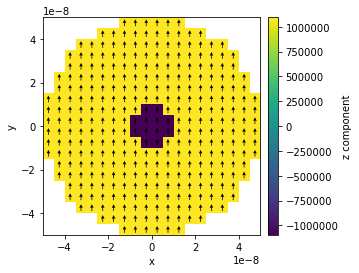

In [5]:
Ms = 1.1e6

def Ms_fun(pos):
    """Function to set magnitude of magnetisation: zero outside cylindric shape, 
    Ms inside cylinder.
    
    Cylinder radius is 50nm."""
   
    x, y, z = pos
    if (x**2 + y**2)**0.5 < 50e-9:
        return Ms
    else:
        return 0

    
def m_init(pos):
    """Function to set initial magnetisation direction: 
    -z inside cylinder (r=10nm),
    +z outside cylinder.
    y-component to break symmetry."""
    x, y, z = pos
    if (x**2 + y**2)**0.5 < 10e-9:
        return (0, 0.1, -1)
    else:
        return (0, 0.1, 1)
    

# create system with above geometry and initial M
system.m = df.Field(mesh, value=m_init, norm=Ms_fun)

# plot initial magnetisation: show vector in z-plane cross section
system.m.plane('z').mpl()

In [6]:
# minimize the energy
md = oc.MinDriver()
md.drive(system)

# refer to magnetisation as m
m = system.m

2019/11/22 16:12: Running OOMMF (skyrmion.mif) ... (1.5 s)


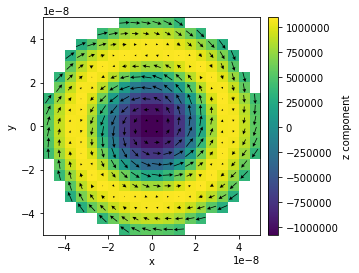

In [7]:
# Plot relaxed configuration: vectors in z-plane
m.plane('z').mpl()

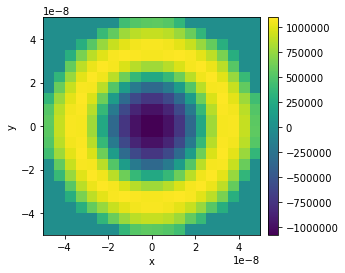

In [8]:
# Plot z-component only:
m.z.plane('z').mpl()

In [9]:
# 3d-plot of z-component
m.z.k3d_voxels(norm_field=m.norm)

Output()

In [10]:
# scan magnetisation along line

import numpy as np
import pylab
mz_data = []
mx_data = []
xs = []
for x in np.linspace(-49e-9, 49e-9, 20):
    mx, my, mz = m([x, 0, 0e-9])
    mz_data.append(mz) 
    xs.append(x)


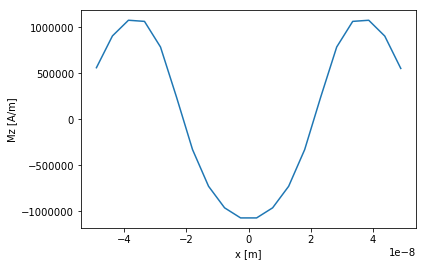

In [11]:
# plot the scanned data
pylab.plot(xs, mz_data, '-')
pylab.xlabel('x [m]')
pylab.ylabel('Mz [A/m]');

In [12]:
system.delete()

## Other

More details on various functionality can be found in the [API Reference](https://oommfc.readthedocs.io/en/latest/).